# 🏛 Bank Customer Churn Predictor
<hr style="border:1px solid #ccc">

## 👨‍💻 Author: **Muhammad Haweras**

[![LinkedIn](https://img.shields.io/badge/LinkedIn-blue?logo=linkedin&logoColor=white)](https://www.linkedin.com/in/muhammad-haweras-7aa6b11b2/)
[![GitHub](https://img.shields.io/badge/GitHub-100000?logo=github&logoColor=white)](https://github.com/MuhammadHaweras)

<hr style="border:1px solid #ccc">

### 📊 About the Dataset

🔗 **Dataset Link:** [Bank Customer Churn](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn)

---

| **Column Name**       | **Description**                                                                                                                                  | **Impact on Churn**                          |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------|
| `RowNumber`           | Index of the record in the dataset.                                                                                                              | ❌ No impact                                  |
| `CustomerId`          | Unique identifier for each customer (randomized).                                                                                                | ❌ No impact                                  |
| `Surname`             | Customer’s last name.                                                                                                                             | ❌ No impact                                  |
| `CreditScore`         | Indicates the creditworthiness of a customer.                                                                                                    | ✅ Higher score → Less likely to churn        |
| `Geography`           | Customer’s country/location.                                                                                                                     | ✅ Geographic trends may influence churn      |
| `Gender`              | Customer’s gender.                                                                                                                                | 🟡 Might show minor patterns                  |
| `Age`                 | Age of the customer.                                                                                                                              | ✅ Older customers → Less likely to churn     |
| `Tenure`              | Number of years the customer has been with the bank.                                                                                             | ✅ Longer tenure → More loyalty               |
| `Balance`             | Amount of money in the customer’s account.                                                                                                       | ✅ Higher balance → Less likely to churn      |
| `NumOfProducts`       | Number of products purchased from the bank.                                                                                                      | ✅ Indicates engagement level                 |
| `HasCrCard`           | Indicates if the customer has a credit card.                                                                                                     | ✅ Credit card holders churn less             |
| `IsActiveMember`      | Whether the customer actively engages with the bank.                                                                                             | ✅ Active users → Less likely to churn        |
| `EstimatedSalary`     | Estimated income of the customer.                                                                                                                | 🟡 Some impact (low income → higher churn)    |
| `Exited`              | Target variable – whether the customer left the bank.                                                                                            | 🎯 Target variable                            |
| `Complain`            | Whether the customer has made a complaint.                                                                                                       | ✅ Complaints may indicate dissatisfaction     |
| `Satisfaction Score`  | Rating given by the customer post-complaint resolution.                                                                                          | ✅ Lower scores → Higher churn risk           |
| `Card Type`           | Type of credit/debit card used.                                                                                                                  | 🟡 Some types may correlate with loyalty      |
| `Points Earned`       | Points accumulated through card usage.                                                                                                           | ✅ More points → Higher engagement, lower churn |

---

### 🎯 Insight:
> Preventing churn is far more cost-effective than acquiring new customers.  
By analyzing key features like **Age**, **Balance**, **Tenure**, and **Satisfaction Score**, banks can **build loyalty programs** and **targeted retention campaigns**.

<hr>

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

### Reading Data

In [2]:
df = pd.read_csv('./Bank-Customer-Churn-Records.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


## Exploratory Data Analysis (EDA)
<hr>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

> * Droping irrelevant columns

In [4]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [5]:
df.columns.to_list()

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'Complain',
 'Satisfaction Score',
 'Card Type',
 'Point Earned']

> Checking for missing values

<Axes: >

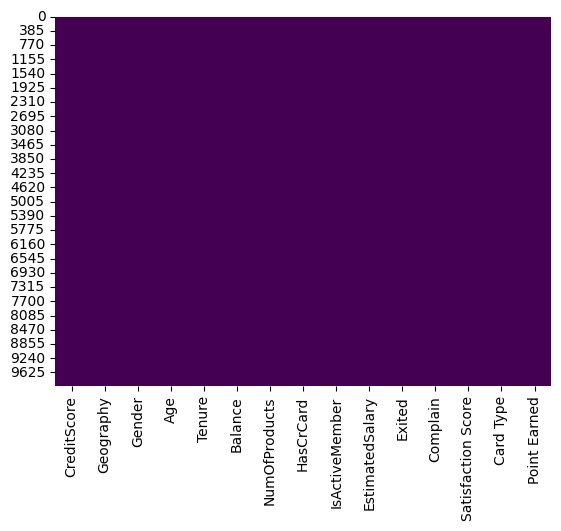

In [6]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [7]:
df.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

> There is no missing value in the dataset

In [8]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


### Exploring `Age` Column

<Axes: xlabel='Age', ylabel='Count'>

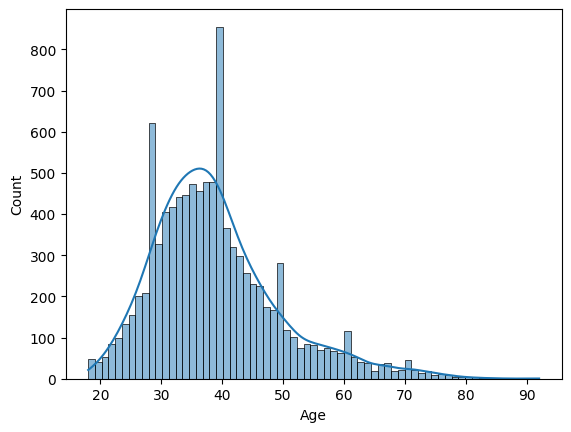

In [9]:
sns.histplot(df['Age'], kde=True)

> Applying statistical normal test to ensure `Age` column's normal distribution

In [10]:
stat, p = normaltest(df['Age'])
print(f"Normal Test statistic: {stat}, p-value: {p}")
if p > 0.05:
	print("Age data appears to be normally distributed")
else:
	print("Age data does not appear to be normally distributed")

Normal Test statistic: 1507.7908881363314, p-value: 0.0
Age data does not appear to be normally distributed


In [11]:
px.box(df, y='Age', title='Age Boxplot')

> Creating Age Groups

In [12]:
# Create age bins and labels
age_bins = [18, 30, 45, 60, df['Age'].max()]
age_labels = ['18-30', '31-45', '46-60', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True, include_lowest=True)

churn_by_age = df.groupby('AgeGroup')['Exited'].mean().reset_index()

fig = px.bar(churn_by_age, x='AgeGroup', y='Exited', title='Churn Rate by Age Group', labels={'Exited': 'Churn Rate', 'AgeGroup': 'Age Group'})
fig.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_20356\2457468020.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



> Calculating Customer Churn Ratio in each Age Group

In [13]:
churn_count_by_age = df.groupby(['AgeGroup', 'Exited']).size().reset_index(name='Count')

# Pivot to get churn counts for each age group
churn_counts_age = churn_count_by_age.pivot(index='AgeGroup', columns='Exited', values='Count').fillna(0)

churn_ratio_age = churn_counts_age[1] / churn_counts_age.sum(axis=1)

for age_group in churn_ratio_age.index:
	print(f"{age_group}: {churn_ratio_age[age_group]:.2f} ({churn_ratio_age[age_group]*100:.1f}% churn rate)")

18-30: 0.08 (7.5% churn rate)
31-45: 0.16 (15.8% churn rate)
46-60: 0.51 (51.1% churn rate)
60+: 0.25 (24.8% churn rate)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_20356\541133650.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Exploring `Gender` Column

In [14]:
fig = px.histogram(df, x='Gender', color='Gender', title='Distribution of Gender',
					 color_discrete_map={'Male': 'blue', 'Female': 'pink'}, width=500, height=300)
fig.show()


> Checking no. of Churn customers by `Gender`

In [15]:
churn_count_by_gender = df.groupby(['Gender', 'Exited']).size().reset_index(name='Count')

fig = px.bar(churn_count_by_gender, x='Gender', y='Count', color='Exited',
			 barmode='group', title='Churn Count by Gender',
			 labels={'Count': 'Customer Count', 'Exited': 'Churned (1=Yes, 0=No)', 'Gender': 'Gender'},
			 color_discrete_map={0: 'green', 1: 'red'})
fig.show()


> Calculate Customer Churn Ratio by Gender

In [16]:
churn_counts = churn_count_by_gender.pivot(index='Gender', columns='Exited', values='Count').fillna(0)
churn_ratio = churn_counts[1] / churn_counts.sum(axis=1)

for gender in churn_ratio.index:
	print(f"{gender}: {churn_ratio[gender]:.2f} ({churn_ratio[gender]*100:.1f}% churn rate)")

Female: 0.25 (25.1% churn rate)
Male: 0.16 (16.5% churn rate)


### Exploring `Geography` column

In [17]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [18]:
fig = px.histogram(df, x='Geography', color='Geography', title='Distribution of Geography',
					 color_discrete_map={'France': 'blue', 'Spain': 'orange', 'Germany': 'green'})
fig.show()

In [19]:
# Calculate churn count by geography
churn_count_by_geo = df.groupby(['Geography', 'Exited']).size().reset_index(name='Count')

fig = px.bar(churn_count_by_geo, x='Geography', y='Count', color='Exited',
			 barmode='group', title='Churn Count by Country',
			 labels={'Count': 'Customer Count', 'Exited': 'Churned (1=Yes, 0=No)', 'Geography': 'Country'},
			 color_discrete_map={0: 'green', 1: 'red'})
fig.show()

> Calculate Customer Churn Ration in each Country

In [20]:
churn_counts_geo = churn_count_by_geo.pivot(index='Geography', columns='Exited', values='Count').fillna(0)
churn_ratio_geo = churn_counts_geo[1] / churn_counts_geo.sum(axis=1)

for country in churn_ratio_geo.index:
	print(f"{country}: {churn_ratio_geo[country]:.2f} ({churn_ratio_geo[country]*100:.1f}% churn rate)")

France: 0.16 (16.2% churn rate)
Germany: 0.32 (32.4% churn rate)
Spain: 0.17 (16.7% churn rate)


> Checking Churned Customers in each country gender wise

In [21]:
plot_df = df[df['Exited'] == 1].groupby(['Geography', 'Gender', 'Exited']).size().reset_index(name='Count')

fig = px.bar(
    plot_df,
    x='Geography',
    y='Count',
    color='Gender',
    facet_col='Exited',
    barmode='group',
    title='Churn by Gender Across Regions',
    labels={
        'Count': 'Customer Count',
        'Geography': 'Country',
        'Gender': 'Gender',
        'Exited': 'Churned (0=No, 1=Yes)'
    },
    color_discrete_map={'Male': 'royalblue', 'Female': 'deeppink'},
    width=900,
    height=400
)

fig.update_layout(
    legend_title_text='Gender',
    font=dict(size=14)
)

fig.show()

> Calculate Customer Churn Ratio Country-wise for Male and Female

In [22]:
churned_counts = df[df['Exited'] == 1].groupby(['Geography', 'Gender']).size().unstack(fill_value=0)
total_counts = df.groupby(['Geography', 'Gender']).size().unstack(fill_value=0)
churned_ratio = churned_counts / total_counts

for country in churned_ratio.index:
	for gender in churned_ratio.columns:
		ratio = churned_ratio.loc[country, gender]
		print(f"{country} - {gender}: {ratio:.2f} ({ratio*100:.1f}% churn rate)")

France - Female: 0.20 (20.3% churn rate)
France - Male: 0.13 (12.7% churn rate)
Germany - Female: 0.38 (37.6% churn rate)
Germany - Male: 0.28 (27.8% churn rate)
Spain - Female: 0.21 (21.2% churn rate)
Spain - Male: 0.13 (13.1% churn rate)


### Exploring `CreditScore` column

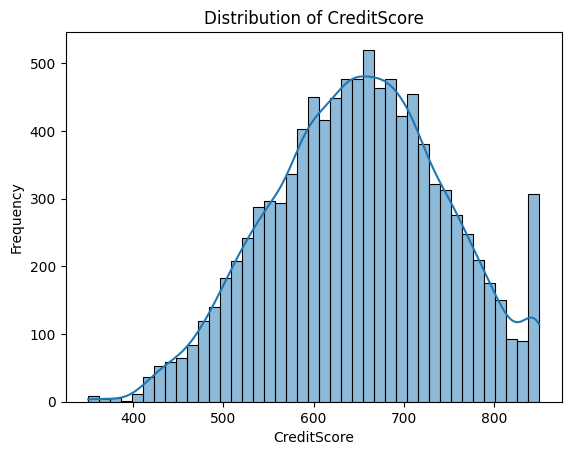

Normal Test statistic: 132.82837928588427, p-value: 1.434445056038405e-29
CreditScore data does not appear to be normally distributed.


In [23]:
# Distribution plot
sns.histplot(df['CreditScore'], kde=True)
plt.title('Distribution of CreditScore')
plt.xlabel('CreditScore')
plt.ylabel('Frequency')
plt.show()

# Boxplot
px.box(df, y='CreditScore', title='CreditScore Boxplot').show()

# Normality test
stat, p = normaltest(df['CreditScore'])
print(f"Normal Test statistic: {stat}, p-value: {p}")
if p > 0.05:
	print("CreditScore data appears to be normally distributed.")
else:
	print("CreditScore data does not appear to be normally distributed.")

> Creating `CreditScore` categories

In [24]:
credit_bins = [300, 400, 500, 600, 700, 800, 900]
credit_labels = ['300-400', '401-500', '501-600', '601-700', '701-800', '801-900']
df['CreditScoreGroup'] = pd.cut(df['CreditScore'], bins=credit_bins, labels=credit_labels, right=True, include_lowest=True)
df['CreditScoreGroup'].value_counts().sort_index()

CreditScoreGroup
300-400      19
401-500     624
501-600    2423
601-700    3818
701-800    2471
801-900     645
Name: count, dtype: int64

>Checking Count of Churn Customers from each `CreditScore` Category

In [25]:
# Filter only churned customers
churned_df = df[df['Exited'] == 1]

# Count churned customers in each credit score group
churned_by_credit = churned_df['CreditScoreGroup'].value_counts().sort_index().reset_index()
churned_by_credit.columns = ['CreditScoreGroup', 'ChurnedCount']

# Plot churned count by credit score group
fig = px.bar(
	churned_by_credit,
	x='CreditScoreGroup',
	y='ChurnedCount',
	title='Churned Customers by Credit Score Group',
	labels={'CreditScoreGroup': 'Credit Score Group', 'ChurnedCount': 'Churned Customer Count'},
	color='CreditScoreGroup'
)
fig.show()

> Checking Count of Churn Customers by `CreditScoreGroup`, `Geography`, and `Gender`

In [26]:
churned_grouped = churned_df.groupby(['CreditScoreGroup', 'Geography', 'Gender']).size().reset_index(name='ChurnedCount')

fig = px.bar(
	churned_grouped,
	x='CreditScoreGroup',
	y='ChurnedCount',
	color='Gender',
	facet_col='Geography',
	barmode='group',
	title='Churned Customers by Credit Score Group, Region, and Gender',
	labels={'CreditScoreGroup': 'Credit Score Group', 'ChurnedCount': 'Churned Customer Count', 'Gender': 'Gender'},
	color_discrete_map={'Male': 'royalblue', 'Female': 'deeppink'},
	width=1200,
	height=400
)
fig.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20356\253680135.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



> Calculate churn ratio for each `CreditScoreGroup`, `Geography`, and `Gender`

In [27]:
total_grouped = df.groupby(['CreditScoreGroup', 'Geography', 'Gender']).size().reset_index(name='TotalCount')
merged = pd.merge(churned_grouped, total_grouped, on=['CreditScoreGroup', 'Geography', 'Gender'], how='left')
merged['ChurnRatio'] = merged['ChurnedCount'] / merged['TotalCount']

# Print churn ratio for each group
for _, row in merged.iterrows():
	print(f"{row['Geography']} - {row['Gender']} - {row['CreditScoreGroup']}: {row['ChurnRatio']:.2f} ({row['ChurnRatio']*100:.1f}% churn rate)")

France - Female - 300-400: 1.00 (100.0% churn rate)
France - Male - 300-400: 1.00 (100.0% churn rate)
Germany - Female - 300-400: 1.00 (100.0% churn rate)
Germany - Male - 300-400: 1.00 (100.0% churn rate)
Spain - Female - 300-400: 1.00 (100.0% churn rate)
Spain - Male - 300-400: 1.00 (100.0% churn rate)
France - Female - 401-500: 0.20 (20.0% churn rate)
France - Male - 401-500: 0.16 (16.5% churn rate)
Germany - Female - 401-500: 0.38 (38.5% churn rate)
Germany - Male - 401-500: 0.28 (27.8% churn rate)
Spain - Female - 401-500: 0.23 (23.2% churn rate)
Spain - Male - 401-500: 0.08 (8.0% churn rate)
France - Female - 501-600: 0.21 (20.8% churn rate)
France - Male - 501-600: 0.13 (13.2% churn rate)
Germany - Female - 501-600: 0.38 (38.0% churn rate)
Germany - Male - 501-600: 0.32 (31.8% churn rate)
Spain - Female - 501-600: 0.21 (20.9% churn rate)
Spain - Male - 501-600: 0.14 (14.2% churn rate)
France - Female - 601-700: 0.21 (20.7% churn rate)
France - Male - 601-700: 0.13 (13.0% churn r

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20356\1672547317.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Exploring `Tenure Column`

In [28]:
df.rename(columns={'Tenure': 'Tenure(Years)'}, inplace=True)

In [29]:
df['Tenure(Years)'].value_counts().sort_index()

Tenure(Years)
0      413
1     1035
2     1048
3     1009
4      989
5     1012
6      967
7     1028
8     1025
9      984
10     490
Name: count, dtype: int64

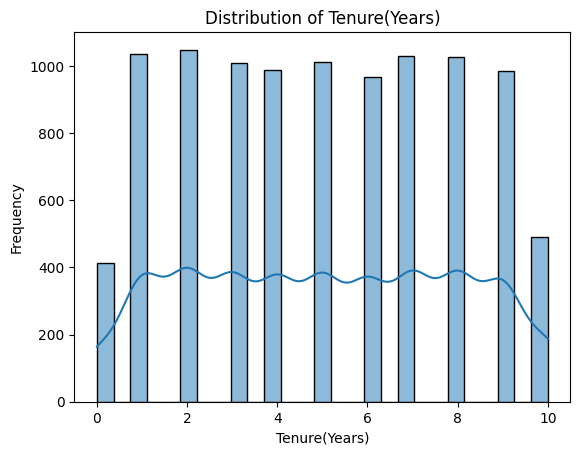

In [30]:
sns.histplot(df['Tenure(Years)'], kde=True)
plt.title('Distribution of Tenure(Years)')
plt.xlabel('Tenure(Years)')
plt.ylabel('Frequency')
plt.show()


> Checking Count of Churn Customers in each Tenure

In [31]:
churned_tenure = df[df['Exited'] == 1]['Tenure(Years)'].value_counts().sort_index().reset_index()
churned_tenure.columns = ['Tenure(Years)', 'ChurnedCount']

fig = px.bar(
	churned_tenure,
	x='Tenure(Years)',
	y='ChurnedCount',
	title='Churned Customers by Tenure (Years)',
	labels={'Tenure(Years)': 'Tenure (Years)', 'ChurnedCount': 'Churned Customer Count'},
	color='Tenure(Years)'
)
fig.show()

> calculate Customer Churn Ration in each `Tenure`

In [32]:
# Calculate total customers by tenure
total_tenure = df['Tenure(Years)'].value_counts().sort_index().reset_index()
total_tenure.columns = ['Tenure(Years)', 'TotalCount']

# Merge churned and total counts
merged_tenure = pd.merge(churned_tenure, total_tenure, on='Tenure(Years)', how='left')
merged_tenure['ChurnRatio'] = merged_tenure['ChurnedCount'] / merged_tenure['TotalCount']

for _, row in merged_tenure.iterrows():
	print(f"Tenure {row['Tenure(Years)']}: {row['ChurnRatio']:.2f} ({row['ChurnRatio']*100:.1f}% churn rate)")

Tenure 0.0: 0.23 (23.0% churn rate)
Tenure 1.0: 0.22 (22.4% churn rate)
Tenure 2.0: 0.19 (19.2% churn rate)
Tenure 3.0: 0.21 (21.1% churn rate)
Tenure 4.0: 0.21 (20.5% churn rate)
Tenure 5.0: 0.21 (20.7% churn rate)
Tenure 6.0: 0.20 (20.3% churn rate)
Tenure 7.0: 0.17 (17.2% churn rate)
Tenure 8.0: 0.19 (19.2% churn rate)
Tenure 9.0: 0.22 (21.7% churn rate)
Tenure 10.0: 0.21 (20.6% churn rate)


### Exploring `Balance` Column

In [33]:
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

> Creating Categories of `Balanace` Column

In [34]:
# Define balance bins and labels
balance_bins = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000, 250000, df['Balance'].max()]
balance_labels = [
	'0-25k', '25k-50k', '50k-75k', '75k-100k', '100k-125k', '125k-150k',
	'150k-175k', '175k-200k', '200k-225k', '225k-250k', '250k+'
]
df['BalanceGroup'] = pd.cut(df['Balance'], bins=balance_bins, labels=balance_labels, right=True, include_lowest=True)
df['BalanceGroup'].value_counts().sort_index()

BalanceGroup
0-25k        3623
25k-50k        69
50k-75k       349
75k-100k     1160
100k-125k    2068
125k-150k    1762
150k-175k     738
175k-200k     197
200k-225k      32
225k-250k       1
250k+           1
Name: count, dtype: int64

In [35]:
fig = px.histogram(df, x='BalanceGroup', color='BalanceGroup', title='Distribution of Balance Groups',
					 labels={'BalanceGroup': 'Balance Group'}, width=900, height=400)
fig.show()

In [36]:
churned_balance = df[df['Exited'] == 1]['BalanceGroup'].value_counts().sort_index().reset_index()
churned_balance.columns = ['BalanceGroup', 'ChurnedCount']

fig = px.bar(
	churned_balance,
	x='BalanceGroup',
	y='ChurnedCount',
	title='Churned Customers by Balance Group',
	labels={'BalanceGroup': 'Balance Group', 'ChurnedCount': 'Churned Customer Count'},
	color='BalanceGroup'
)
fig.show()

> Calculate Churn Customer Ration by Balance Group

In [37]:
# Calculate total customers by balance group
total_balance = df['BalanceGroup'].value_counts().sort_index().reset_index()
total_balance.columns = ['BalanceGroup', 'TotalCount']

# Merge churned and total counts
merged_balance = pd.merge(churned_balance, total_balance, on='BalanceGroup', how='left')
merged_balance['ChurnRatio'] = merged_balance['ChurnedCount'] / merged_balance['TotalCount']

for _, row in merged_balance.iterrows():
	print(f"Balance {row['BalanceGroup']}: {row['ChurnRatio']:.2f} ({row['ChurnRatio']*100:.1f}% churn rate)")

Balance 0-25k: 0.14 (13.9% churn rate)
Balance 25k-50k: 0.32 (31.9% churn rate)
Balance 50k-75k: 0.21 (21.5% churn rate)
Balance 75k-100k: 0.19 (19.5% churn rate)
Balance 100k-125k: 0.27 (27.0% churn rate)
Balance 125k-150k: 0.24 (24.3% churn rate)
Balance 150k-175k: 0.21 (21.1% churn rate)
Balance 175k-200k: 0.25 (24.9% churn rate)
Balance 200k-225k: 0.53 (53.1% churn rate)
Balance 225k-250k: 1.00 (100.0% churn rate)
Balance 250k+: 1.00 (100.0% churn rate)


In [38]:
df[df['Balance'] == df['Balance'].max()]

,CreditScore,Geography,Gender,Age,Tenure(Years),Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,AgeGroup,CreditScoreGroup,BalanceGroup
2092,655,Spain,Male,38,3,250898.09,3,0,1,81054.0,1,1,1,SILVER,336,31-45,601-700,250k+


### Exploring `NumOfProducts` Column

In [39]:
df['NumOfProducts'].value_counts().sort_index()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [40]:
fig = px.histogram(df, x='NumOfProducts', color='NumOfProducts', title='Distribution of Number of Products',
					 labels={'NumOfProducts': 'Number of Products'}, width=600, height=350)
fig.show()

> Showing no. of Churn Customers by `NumOfProducts`

In [41]:
churned_products = df[df['Exited'] == 1]['NumOfProducts'].value_counts().sort_index().reset_index()
churned_products.columns = ['NumOfProducts', 'ChurnedCount']

fig = px.bar(
	churned_products,
	x='NumOfProducts',
	y='ChurnedCount',
	title='Churned Customers by Number of Products',
	labels={'NumOfProducts': 'Number of Products', 'ChurnedCount': 'Churned Customer Count'},
	color='NumOfProducts'
)
fig.show()

> Calculate no. of Churn Customer Ratio by `NumOfProducts`

In [42]:
# Calculate total customers by number of products
total_products = df['NumOfProducts'].value_counts().sort_index().reset_index()
total_products.columns = ['NumOfProducts', 'TotalCount']

# Merge churned and total counts
merged_products = pd.merge(churned_products, total_products, on='NumOfProducts', how='left')
merged_products['ChurnRatio'] = merged_products['ChurnedCount'] / merged_products['TotalCount']

# Print churn ratio for each number of products
for _, row in merged_products.iterrows():
	print(f"NumOfProducts {row['NumOfProducts']}: {row['ChurnRatio']:.2f} ({row['ChurnRatio']*100:.1f}% churn rate)")

NumOfProducts 1.0: 0.28 (27.7% churn rate)
NumOfProducts 2.0: 0.08 (7.6% churn rate)
NumOfProducts 3.0: 0.83 (82.7% churn rate)
NumOfProducts 4.0: 1.00 (100.0% churn rate)


### Exploring `HasCard` Column

In [43]:
df.HasCrCard.value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [44]:
df.rename(columns={'HasCrCard': 'HasCard'}, inplace=True)

In [45]:
fig = px.histogram(df, x='HasCard', color='HasCard', title='Distribution of HasCard',
					 labels={'HasCard': 'Has Credit Card'}, width=500, height=300)
fig.show()

> Showing no. of Churn Customers by `HasCard`

In [46]:
churned_card = df[df['Exited'] == 1]['HasCard'].value_counts().reset_index()
churned_card.columns = ['HasCard', 'ChurnedCount']

fig = px.bar(
	churned_card,
	x='HasCard',
	y='ChurnedCount',
	title='Churned Customers by HasCard',
	labels={'HasCard': 'Has Credit Card', 'ChurnedCount': 'Churned Customer Count'},
	color='HasCard'
)
fig.show()

> Calculate Customer Churn Ratio by `HasCard`

In [47]:
total_card = df['HasCard'].value_counts().reset_index()
total_card.columns = ['HasCard', 'TotalCount']

merged_card = pd.merge(churned_card, total_card, on='HasCard', how='left')
merged_card['ChurnRatio'] = merged_card['ChurnedCount'] / merged_card['TotalCount']

for _, row in merged_card.iterrows():
	print(f"HasCard {row['HasCard']}: {row['ChurnRatio']:.2f} ({row['ChurnRatio']*100:.1f}% churn rate)")

HasCard 1.0: 0.20 (20.2% churn rate)
HasCard 0.0: 0.21 (20.8% churn rate)


### Exploring `IsActiveMember` Column
> Showwing Churn Customers by `IsActiveMember`

In [48]:
churned_active = df[df['Exited'] == 1]['IsActiveMember'].value_counts().reset_index()
churned_active.columns = ['IsActiveMember', 'ChurnedCount']

fig = px.bar(
	churned_active,
	x='IsActiveMember',
	y='ChurnedCount',
	title='Churned Customers by IsActiveMember',
	labels={'IsActiveMember': 'Is Active Member', 'ChurnedCount': 'Churned Customer Count'},
	color='IsActiveMember'
)
fig.show()

> Calculate Customers Churn Ratio by `IsActiveMember`

In [49]:
# Calculate churn ratio for IsActiveMember
total_active = df['IsActiveMember'].value_counts().reset_index()
total_active.columns = ['IsActiveMember', 'TotalCount']

merged_active = pd.merge(churned_active, total_active, on='IsActiveMember', how='left')
merged_active['ChurnRatio'] = merged_active['ChurnedCount'] / merged_active['TotalCount']

for _, row in merged_active.iterrows():
	print(f"IsActiveMember {row['IsActiveMember']}: {row['ChurnRatio']:.2f} ({row['ChurnRatio']*100:.1f}% churn rate)")

IsActiveMember 0.0: 0.27 (26.9% churn rate)
IsActiveMember 1.0: 0.14 (14.3% churn rate)


### Exploring `EstimatedSalary` Column

In [50]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [51]:
px.box(df, y='EstimatedSalary', title='Estimated Salary Boxplot').show()

> Creating `EstimatedSalary` Categories

In [52]:
# Define estimated salary bins and labels
salary_bins = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, df['EstimatedSalary'].max()]
salary_labels = [
	'0-25k', '25k-50k', '50k-75k', '75k-100k', '100k-125k', '125k-150k',
	'150k-175k', '175k+'
]
df['SalaryGroup'] = pd.cut(df['EstimatedSalary'], bins=salary_bins, labels=salary_labels, right=True, include_lowest=True)
df['SalaryGroup'].value_counts().sort_index()

SalaryGroup
0-25k        1217
25k-50k      1236
50k-75k      1269
75k-100k     1268
100k-125k    1276
125k-150k    1279
150k-175k    1195
175k+        1260
Name: count, dtype: int64

> Showing Churn Customers in each `SalaryGroup`

In [53]:
churned_salary = df[df['Exited'] == 1]['SalaryGroup'].value_counts().sort_index().reset_index()
churned_salary.columns = ['SalaryGroup', 'ChurnedCount']

fig = px.bar(
	churned_salary,
	x='SalaryGroup',
	y='ChurnedCount',
	title='Churned Customers by Salary Group',
	labels={'SalaryGroup': 'Salary Group', 'ChurnedCount': 'Churned Customer Count'},
	color='SalaryGroup'
)
fig.show()

> Calculate Churn Customers Ration in each `SalaryGroup`

In [54]:
# Calculate total customers by SalaryGroup
total_salary = df['SalaryGroup'].value_counts().sort_index().reset_index()
total_salary.columns = ['SalaryGroup', 'TotalCount']

# Merge churned and total counts
merged_salary = pd.merge(churned_salary, total_salary, on='SalaryGroup', how='left')
merged_salary['ChurnRatio'] = merged_salary['ChurnedCount'] / merged_salary['TotalCount']

for _, row in merged_salary.iterrows():
	print(f"SalaryGroup {row['SalaryGroup']}: {row['ChurnRatio']:.2f} ({row['ChurnRatio']*100:.1f}% churn rate)")

SalaryGroup 0-25k: 0.20 (19.9% churn rate)
SalaryGroup 25k-50k: 0.20 (20.0% churn rate)
SalaryGroup 50k-75k: 0.21 (21.0% churn rate)
SalaryGroup 75k-100k: 0.19 (18.8% churn rate)
SalaryGroup 100k-125k: 0.20 (20.1% churn rate)
SalaryGroup 125k-150k: 0.20 (20.4% churn rate)
SalaryGroup 150k-175k: 0.21 (21.3% churn rate)
SalaryGroup 175k+: 0.22 (21.7% churn rate)


### Exploring `Complain` Column

In [55]:
df['Complain'].value_counts()

Complain
0    7956
1    2044
Name: count, dtype: int64

In [56]:
fig = px.histogram(df, x='Complain', color='Complain', title='Distribution of Complain',
					 labels={'Complain': 'Complain'}, width=500, height=300)
fig.show()

> Showing Churn Customers by `Complain`

In [57]:
# Filter churned customers by Complain
churned_complain = df[df['Exited'] == 1]['Complain'].value_counts().reset_index()
churned_complain.columns = ['Complain', 'ChurnedCount']

fig = px.bar(
	churned_complain,
	x='Complain',
	y='ChurnedCount',
	title='Churned Customers by Complain',
	labels={'Complain': 'Complain', 'ChurnedCount': 'Churned Customer Count'},
	color='Complain'
)
fig.show()

> Calculate Churn Customers Ratio by `Complain`

In [58]:
# Calculate total customers by Complain
total_complain = df['Complain'].value_counts().reset_index()
total_complain.columns = ['Complain', 'TotalCount']

# Merge churned and total counts
merged_complain = pd.merge(churned_complain, total_complain, on='Complain', how='left')
merged_complain['ChurnRatio'] = merged_complain['ChurnedCount'] / merged_complain['TotalCount']

for _, row in merged_complain.iterrows():
	print(f"Complain {row['Complain']}: {row['ChurnRatio']:.2f} ({row['ChurnRatio']*100:.1f}% churn rate)")

Complain 1.0: 1.00 (99.5% churn rate)
Complain 0.0: 0.00 (0.1% churn rate)


### Exploring `Satisfaction Score` Column

In [59]:
df['Satisfaction Score'].value_counts()

Satisfaction Score
3    2042
2    2014
4    2008
5    2004
1    1932
Name: count, dtype: int64

In [60]:
fig = px.histogram(df, x='Satisfaction Score', color='Satisfaction Score', title='Distribution of Satisfaction Score',
					 labels={'Satisfaction Score': 'Satisfaction Score'}, width=600, height=350)
fig.show()

> Showing Churn Customers by `Satisfaction Score`

In [61]:
# Filter churned customers by Satisfaction Score
churned_satisfaction = df[df['Exited'] == 1]['Satisfaction Score'].value_counts().sort_index().reset_index()
churned_satisfaction.columns = ['Satisfaction Score', 'ChurnedCount']

fig = px.bar(
	churned_satisfaction,
	x='Satisfaction Score',
	y='ChurnedCount',
	title='Churned Customers by Satisfaction Score',
	labels={'Satisfaction Score': 'Satisfaction Score', 'ChurnedCount': 'Churned Customer Count'},
	color='Satisfaction Score'
)
fig.show()

> Calculate Churn Customers Ratio by `Satisfaction Score`

In [62]:
# Calculate total customers by Satisfaction Score
total_satisfaction = df['Satisfaction Score'].value_counts().sort_index().reset_index()
total_satisfaction.columns = ['Satisfaction Score', 'TotalCount']

# Merge churned and total counts
merged_satisfaction = pd.merge(churned_satisfaction, total_satisfaction, on='Satisfaction Score', how='left')
merged_satisfaction['ChurnRatio'] = merged_satisfaction['ChurnedCount'] / merged_satisfaction['TotalCount']

for _, row in merged_satisfaction.iterrows():
	print(f"Satisfaction Score {row['Satisfaction Score']}: {row['ChurnRatio']:.2f} ({row['ChurnRatio']*100:.1f}% churn rate)")

Satisfaction Score 1.0: 0.20 (20.0% churn rate)
Satisfaction Score 2.0: 0.22 (21.8% churn rate)
Satisfaction Score 3.0: 0.20 (19.6% churn rate)
Satisfaction Score 4.0: 0.21 (20.6% churn rate)
Satisfaction Score 5.0: 0.20 (19.8% churn rate)


### Exploring `Card Type`

In [63]:
df['Card Type'].value_counts()

Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64

In [64]:
fig = px.histogram(df, x='Card Type', color='Card Type', title='Distribution of Card Type',
					 labels={'Card Type': 'Card Type'}, width=600, height=350)
fig.show()

> Showing Churn Customers from each `Card Type`

In [65]:
# Filter churned customers by Card Type
churned_cardtype = df[df['Exited'] == 1]['Card Type'].value_counts().reset_index()
churned_cardtype.columns = ['Card Type', 'ChurnedCount']

fig = px.bar(
	churned_cardtype,
	x='Card Type',
	y='ChurnedCount',
	title='Churned Customers by Card Type',
	labels={'Card Type': 'Card Type', 'ChurnedCount': 'Churned Customer Count'},
	color='Card Type'
)
fig.show()

> Calculate Customers Churn Ratio from each `'Card Type`

In [66]:
# Calculate total customers by Card Type
total_cardtype = df['Card Type'].value_counts().reset_index()
total_cardtype.columns = ['Card Type', 'TotalCount']

# Merge churned and total counts
merged_cardtype = pd.merge(churned_cardtype, total_cardtype, on='Card Type', how='left')
merged_cardtype['ChurnRatio'] = merged_cardtype['ChurnedCount'] / merged_cardtype['TotalCount']

for _, row in merged_cardtype.iterrows():
	print(f"Card Type {row['Card Type']}: {row['ChurnRatio']:.2f} ({row['ChurnRatio']*100:.1f}% churn rate)")

Card Type DIAMOND: 0.22 (21.8% churn rate)
Card Type PLATINUM: 0.20 (20.4% churn rate)
Card Type SILVER: 0.20 (20.1% churn rate)
Card Type GOLD: 0.19 (19.3% churn rate)


### Exloring `Point Earned` Column

In [67]:
df['Point Earned'].describe()

count    10000.000000
mean       606.515100
std        225.924839
min        119.000000
25%        410.000000
50%        605.000000
75%        801.000000
max       1000.000000
Name: Point Earned, dtype: float64

> Creating categories of `Point Earned`

In [68]:
point_bins = [0, 200, 400, 600, 800, 1000]
point_labels = [
	'0-200', '201-400', '401-600', '601-800', '801-1000'
]
df['PointEarnedGroup'] = pd.cut(df['Point Earned'], bins=point_bins, labels=point_labels, right=True, include_lowest=True)
df['PointEarnedGroup'].value_counts().sort_index()

PointEarnedGroup
0-200          2
201-400     2355
401-600     2589
601-800     2553
801-1000    2501
Name: count, dtype: int64

In [69]:
fig = px.histogram(
	df.sort_values('PointEarnedGroup'), 
	x='PointEarnedGroup', 
	color='PointEarnedGroup', 
	title='Distribution of Point Earned Groups',
	labels={'PointEarnedGroup': 'Point Earned Group'}, 
	width=700, 
	height=350
)
fig.show()

> Showing Churn Customers from each `PointEarnedGroup`

In [70]:
# Filter churned customers by PointEarnedGroup
churned_point = df[df['Exited'] == 1]['PointEarnedGroup'].value_counts().sort_index().reset_index()
churned_point.columns = ['PointEarnedGroup', 'ChurnedCount']

fig = px.bar(
	churned_point,
	x='PointEarnedGroup',
	y='ChurnedCount',
	title='Churned Customers by Point Earned Group',
	labels={'PointEarnedGroup': 'Point Earned Group', 'ChurnedCount': 'Churned Customer Count'},
	color='PointEarnedGroup'
)
fig.show()

> Calculate Customers Churn Ratio from each `PointEarnedGroup`

In [71]:
# Calculate total customers by PointEarnedGroup
total_point = df['PointEarnedGroup'].value_counts().sort_index().reset_index()
total_point.columns = ['PointEarnedGroup', 'TotalCount']

# Merge churned and total counts
merged_point = pd.merge(churned_point, total_point, on='PointEarnedGroup', how='left')
merged_point['ChurnRatio'] = merged_point['ChurnedCount'] / merged_point['TotalCount']

for _, row in merged_point.iterrows():
	print(f"PointEarnedGroup {row['PointEarnedGroup']}: {row['ChurnRatio']:.2f} ({row['ChurnRatio']*100:.1f}% churn rate)")

PointEarnedGroup 0-200: 0.50 (50.0% churn rate)
PointEarnedGroup 201-400: 0.21 (21.0% churn rate)
PointEarnedGroup 401-600: 0.19 (19.4% churn rate)
PointEarnedGroup 601-800: 0.21 (21.3% churn rate)
PointEarnedGroup 801-1000: 0.20 (19.8% churn rate)


### Checking Correlation of Numeric Colummns with `Exited` Column

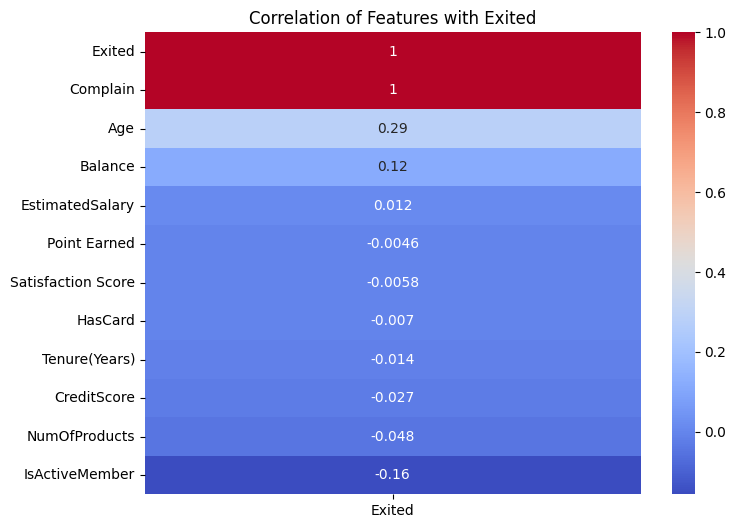

In [72]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix[['Exited']].sort_values(by='Exited', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Exited')
plt.show()

# Machine Learning

---

In [73]:
df.columns.to_list()

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure(Years)',
 'Balance',
 'NumOfProducts',
 'HasCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'Complain',
 'Satisfaction Score',
 'Card Type',
 'Point Earned',
 'AgeGroup',
 'CreditScoreGroup',
 'BalanceGroup',
 'SalaryGroup',
 'PointEarnedGroup']

In [74]:
X = df.drop(columns=['AgeGroup','CreditScoreGroup','BalanceGroup','SalaryGroup','PointEarnedGroup','Exited'], axis=1)
y = df['Exited']

### Feature Encoding

In [75]:
label_encoders = {}

for col in X.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure(Years),Balance,NumOfProducts,HasCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
9254,686,0,1,32,6,0.00,2,1,1,179093.26,0,2,0,510
1561,632,1,1,42,4,119624.60,2,1,1,195978.86,0,4,2,959
1670,559,2,1,24,3,114739.92,1,1,0,85891.02,1,4,3,327
6087,561,0,0,27,9,135637.00,1,1,0,153080.40,1,2,3,567
6669,517,0,1,56,9,142147.32,1,0,0,39488.04,1,3,2,727


***ML models which we will use for multi-class classification:***

1. SVM
2. Decision Tree
3. Random Forest
4. XGboost
5. GradientBoost
6. AdaBoost
7. CatBoost

In [78]:
models = [
	('SVM', SVC(random_state=42)),
	('Decision Tree', DecisionTreeClassifier(random_state=42)),
	('Random Forest', RandomForestClassifier(random_state=42)),
	('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
	('XG Boost', XGBClassifier(random_state=42)),
	('AdaBoost', AdaBoostClassifier(random_state=42)),
	('CatBoost', CatBoostClassifier(verbose=0, random_state=42))
]

### Selecting Best Model with respect to Test Accuracy

In [79]:
best_model = None
best_accuracy = 0.0

for name, model in models:
    pipeline = Pipeline([
        ('model', model)
    ])

    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

    mean_accuracy = scores.mean()

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Model {name}")
    print(f"Cross Validation Accuracy: {mean_accuracy:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

print(f"Best Model: {best_model.named_steps['model'].__class__.__name__}")
print(f"Best Test Accuracy: {best_accuracy:.4f}")

Model SVM
Cross Validation Accuracy: 0.7944
Test Accuracy: 0.8035
Model Decision Tree
Cross Validation Accuracy: 0.9975
Test Accuracy: 0.9970
Model Random Forest
Cross Validation Accuracy: 0.9985
Test Accuracy: 0.9990
Model Gradient Boosting
Cross Validation Accuracy: 0.9981
Test Accuracy: 0.9980
Model XG Boost
Cross Validation Accuracy: 0.9985
Test Accuracy: 0.9990
Model AdaBoost
Cross Validation Accuracy: 0.9985
Test Accuracy: 0.9990
Model CatBoost
Cross Validation Accuracy: 0.9985
Test Accuracy: 0.9990
Best Model: RandomForestClassifier
Best Test Accuracy: 0.9990


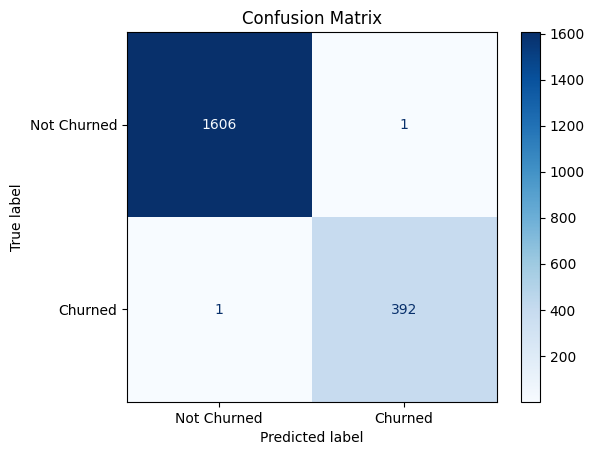

==============================Classification Report=============================:
              precision    recall  f1-score   support

 Not Churned       1.00      1.00      1.00      1607
     Churned       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [80]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Not Churned', 'Churned'], cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print("==============================Classification Report=============================:")
print(classification_report(y_test, y_pred, target_names=['Not Churned', 'Churned']))

### Example test case: Predict churn for a new customer with Confidence Interval

In [81]:
test_case = pd.DataFrame({
	'CreditScore': [50],
	'Geography': ['Spain'],
	'Gender': ['Female'],
	'Age': [20],
	'Tenure(Years)': [1],
	'Balance': [5000],
	'NumOfProducts': [1],
	'HasCard': [1],
	'IsActiveMember': [1],
	'EstimatedSalary': [60000],
	'Complain': [1],
	'Satisfaction Score': [2],
	'Card Type': ['DIAMOND'],
	'Point Earned': [100]
})

# Encode categorical features using label_encoders
for col in test_case.select_dtypes(include=['object', 'category']).columns:
	if col in label_encoders:
		test_case[col] = label_encoders[col].transform(test_case[col])

# Predict churn and confidence
pred = best_model.predict(test_case)[0]
proba = best_model.predict_proba(test_case)[0]

print(f"Prediction: {'Churn' if pred == 1 else 'Not Churned'}")
print(f"Confidence (probability of churn): {proba[1]*100:.2f}%")
print(f"Confidence interval: {proba[0]*100:.2f}% (Not Churned), {proba[1]*100:.2f}% (Churn)")

Prediction: Churn
Confidence (probability of churn): 90.00%
Confidence interval: 10.00% (Not Churned), 90.00% (Churn)


> Saving the model

In [82]:
import joblib

joblib.dump(best_model, 'RandomForestClassifier.pkl')

['RandomForestClassifier.pkl']